# CS 5361/6361 Machine Learning - Classifying the MNIST dataset

**Author:** Ruben Martinez<br>
Computer Science Department<br>
University of Texas at El Paso<br>
**Last Modified:**: 9/13/2024<br>

**The MNIST Dataset**<br>
**Input:** A dataset consisting of pairs *(X,y)*, where *X* consists of 784 pixel intensity values and *y* is an integer indicating the digit contained in *X*.

**Output:** A *model* (or function) that receives instances of *X* and
predicts their corresponding *y*.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data() # (train_images, train_labels), (test_images, test_labels)

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, end = " ")

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,) 

# **Data Preprocessing**
 Reshape the images from ```(10000, 28, 28)``` to ```(10000, 784)``` and normalize the pixel values by dividing by 255.

In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1) / 255
X_test = X_test.reshape(X_test.shape[0], -1) / 255


print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


# **Task 1: Classify the MNIST dataset using the NearestMean algorithm**

Classify the MNIST dataset using the NearestMean algorithm implemented previously and display its performance metrics.

In [ ]:
class NearestMean:

    def __init__(self):
        return

    def fit(self, X, y):
        self.means = np.zeros((np.max(y) + 1, X.shape[1])) # (number of classes, number of features) = 9 rows x 784 columns

        for i in range(self.means.shape[0]):
            # X[y==i] selects the rows for this ith digit from X , compute the average of each pixel along the 784 columns (downwards)
            self.means[i] = np.mean(X[y == i], axis = 0)

    def predict(self, X):
        dist = np.zeros((X.shape[0], self.means.shape[0])) # (number of instances, number of classes) = m rows x 10 columns

        for i in range(dist.shape[1]):
            dist[:,i] = np.sum((X - self.means[i]) ** 2, axis = 1)

        return np.argmin(dist, axis = 1)

    def accuracy(self, y_test, predictions):
        return np.sum(y_test == predictions) / y_test.shape[0]

In [ ]:
model = NearestMean()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(f"Accuracy : {model.accuracy(y_test, predictions)}")

Accuracy : 0.8203


# **Task 2: Create the misclassified dictionary**
Create the dictionary misclassified that has as keys two digits i and j, where i!=j, and where misclassified[i,j] contains the list of the indices of the images in the test set that belong to class i and were classified as belonging to class j.  Note that if c is the confusion matrix, c[i,j] = len(misclassified[i,j]).

In [ ]:
misclassified = {(i ,j) : np.where((y_test == i)&(predictions == j))[0] for i in range(model.means.shape[0]) for j in range(model.means.shape[0]) if i != j}

# **Task 3: Display some images**
Given a list of digits, display them as a sequence of images; and use it to show some of the images in the misclassified dictionary.


Random digits: [0, 8, 4, 7, 6, 7, 2, 0, 7, 1]
This 0 was misclassified as a 7


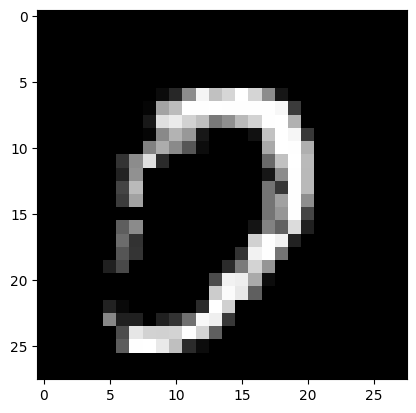

This 8 was misclassified as a 0


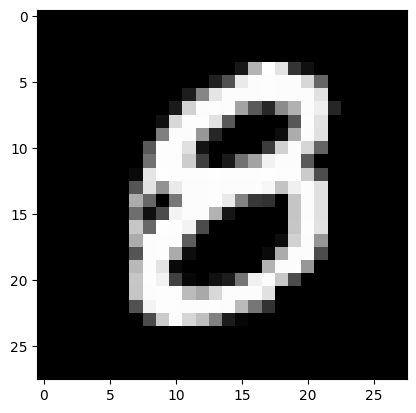

This 4 was misclassified as a 5


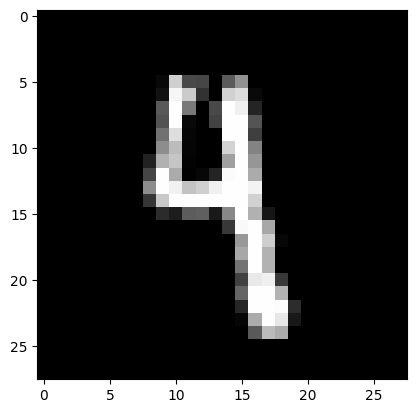

This 6 was misclassified as a 1


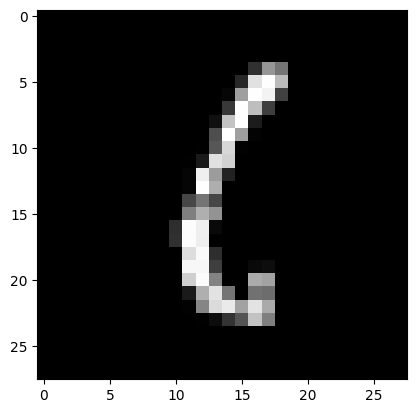

This 2 was misclassified as a 1


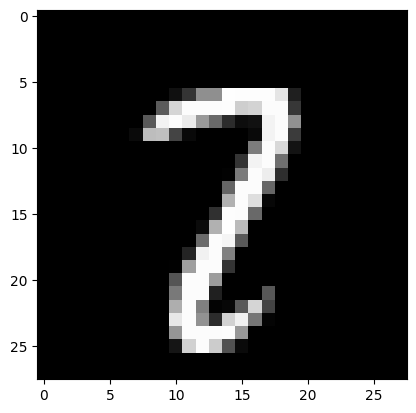

This 0 was misclassified as a 5


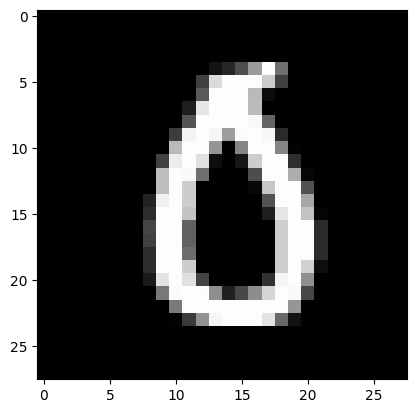

In [ ]:
# Randomly choose 10 digits
digits = [np.random.randint(min(range(model.means.shape[0])), model.means.shape[0]) for _ in range(10)]
print("Random digits:", digits)

for digit in digits:
    random_misclassification_digit = np.random.randint(min(range(model.means.shape[0])), model.means.shape[0]) # choose a random misclassification digit
    # if they are not equal AND there was at least 1 misclassification
    if digit != random_misclassification_digit and len(misclassified[(digit, random_misclassification_digit)]) > 0:
        print(f"This {digit} was misclassified as a {random_misclassification_digit}")
        plt.imshow(X_test[misclassified[digit, random_misclassification_digit][np.random.randint(0, len(misclassified[(digit, random_misclassification_digit)]))]].reshape(28, 28), cmap = "gray")
        plt.show()